<h2> Part 1: Bitly Analysis</h2> 
    <p>The first few blocks replicate the Bitly analysis from chapter 14 to get you started.  There will be a transistion phase where you can complete duplicating the text project.  And then the remainder of the project is left for you to copy over.
    <h2> Your task </h2>
    Your task is to do a similar analysis and processing in Python considering <b>domain names from the 'u' column of data.  'u' is for URL.</b>  Just as there were many different timezones and many observations on the same timezone, there are many domains and many observations on those domains.
    <p> You may revise the code below to directly alter the analysis for your task. OR if you wish, replicate the code below in additional chunks to accomplish the task. Please make it clear where your alterations are found.

In [27]:
import pandas as pd
#and other things

In [1]:
import json
path = 'example.txt'
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [29]:
records = [json.loads(line) for line in open(path)]
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [30]:
import pandas as pd
frame = pd.DataFrame(records)
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [31]:
# Print 10 first URLs
frame['u'][:10]

0          http://www.ncbi.nlm.nih.gov/pubmed/22415991
1          http://www.monroecounty.gov/etc/911/rss.php
2    http://boxer.senate.gov/en/press/releases/0316...
3              http://apod.nasa.gov/apod/ap120312.html
4    http://www.shrewsbury-ma.gov/egov/gallery/1341...
5    http://www.shrewsbury-ma.gov/egov/gallery/1341...
6    http://www.nasa.gov/mission_pages/nustar/main/...
7    http://www.nasa.gov/mission_pages/nustar/main/...
8    http://www.nasa.gov/mission_pages/nustar/main/...
9              http://apod.nasa.gov/apod/ap120312.html
Name: u, dtype: object

In [32]:
# create a list domain names only 
domain_name = []
for x in frame['u']:
    if pd.isna(x):
        domain_name.append('na')
    else:
        domain = x.split('/')[2]
        if domain[:4] == 'www.':
            domain = domain[4:]
        domain_name.append(domain)
domain_name[:5]

['ncbi.nlm.nih.gov',
 'monroecounty.gov',
 'boxer.senate.gov',
 'apod.nasa.gov',
 'shrewsbury-ma.gov']

In [33]:
# Add a new column called d for domain to the frame
frame['d'] = domain_name
frame[:10]

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw,d
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN,ncbi.nlm.nih.gov
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN,monroecounty.gov
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN,boxer.senate.gov
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN,apod.nasa.gov
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN,shrewsbury-ma.gov
5,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,axNK8c,axNK8c,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273673e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN,shrewsbury-ma.gov
6,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,PL,0.0,Europe/Warsaw,77,wcndER,zkpJBR,bnjacobs,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",1.usa.gov,http://plus.url.google.com/url?sa=z&n=13319232...,http://www.nasa.gov/mission_pages/nustar/main/...,1.331923e+09,1.331923e+09,Luban,"[51.116699, 15.2833]",NaN,NaN,nasa.gov
7,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,None,0.0,,NaN,wcndER,zkpJBR,bnjacobs,"bg,en-us;q=0.7,en;q=0.3",1.usa.gov,http://www.facebook.com/,http://www.nasa.gov/mission_pages/nustar/main/...,1.331923e+09,1.331923e+09,NaN,NaN,NaN,NaN,nasa.gov
8,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,None,0.0,,NaN,wcndER,zkpJBR,bnjacobs,"en-US, en",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.nasa.gov/mission_pages/nustar/main/...,1.331923e+09,1.331923e+09,NaN,NaN,NaN,NaN,nasa.gov
9,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,None,0.0,,NaN,zCaLwp,zUtuOu,alelex88,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",1.usa.gov,http://t.co/o1Pd0WeV,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,NaN,NaN,NaN,NaN,apod.nasa.gov


In [34]:
# Fill in unknown and missing values
clean_u = frame['d'].fillna('Missing')
clean_u[clean_u == ''] = 'Unknown'
u_counts = clean_u.value_counts()
u_counts[:10]

nysdot.gov           836
nasa.gov             733
whitehouse.gov       172
monroecounty.gov     121
na                   120
fda.gov              112
shrewsbury-ma.gov     94
bls.gov               64
navy.mil              57
apod.nasa.gov         42
Name: d, dtype: int64

<AxesSubplot:>

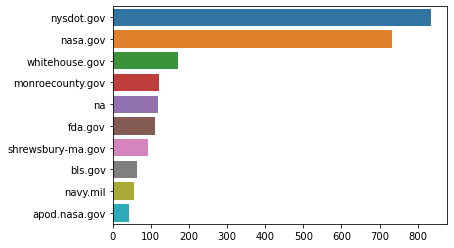

In [35]:
# Visualize the data 
import seaborn as sns
subset = u_counts[:10]
sns.barplot(y=subset.index, x=subset.values)

In [36]:
# a few commands to peek at the data
print(frame.d[1])
print(frame.d[50])
print(frame.d[51][:50])  # long line

monroecounty.gov
nasa.gov
nasa.gov


In [37]:
import numpy as np
cframe = frame[frame.d.notnull()]
# the next command generates a warning that you can ignore
cframe['os'] = np.where(cframe['d'].str.contains('Windows'),
                        'Windows', 'Not Windows')
cframe['os'][:5]

0    Not Windows
1    Not Windows
2    Not Windows
3    Not Windows
4    Not Windows
Name: os, dtype: object

Continue copying over the steps from the text and trying them out.

In [38]:
# group the data by its URL column 
# and this new list of operating systems
by_d_os = cframe.groupby (['d', 'os'])
agg_counts = by_d_os.size().unstack().fillna(0)
agg_counts[:10]


os,Not Windows
d,
accessdata.fda.gov,1
acf.hhs.gov,1
af.mil,3
ag.arkansas.gov,1
ag.ca.gov,2
ag.ks.gov,1
agriculture.house.gov,3
ahrq.gov,4
alexander.senate.gov,1


In [39]:
# sort in ascending order
indexer = agg_counts.sum(1).argsort()
indexer[:10]

d
accessdata.fda.gov         0
acf.hhs.gov              139
af.mil                   281
ag.arkansas.gov          142
ag.ca.gov                143
ag.ks.gov                144
agriculture.house.gov    146
ahrq.gov                 148
alexander.senate.gov     149
ams.usda.gov             155
dtype: int64

 <h2>Part 2: COVID-19 Analysis</h2>
<p>Read the confirmed US or US deaths data set into a dataframe. Do the task as outlined in the assignment page.

In [40]:
# Read the file into a dataframe
covidDF = pd.read_csv('COVID-02-08-2022.csv')
covidDF.head(10)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2/9/22 4:21,33.93911,67.709953,167739,7454,NaN,NaN,Afghanistan,430.891725,4.443809
1,NaN,NaN,NaN,Albania,2/9/22 4:21,41.15330,20.168300,265716,3393,NaN,NaN,Albania,9233.303218,1.276927
2,NaN,NaN,NaN,Algeria,2/9/22 4:21,28.03390,1.659600,259088,6667,NaN,NaN,Algeria,590.836574,2.573257
3,NaN,NaN,NaN,Andorra,2/9/22 4:21,42.50630,1.521800,36808,147,NaN,NaN,Andorra,47638.646220,0.399370
4,NaN,NaN,NaN,Angola,2/9/22 4:21,-11.20270,17.873900,98424,1896,NaN,NaN,Angola,299.468136,1.926359
5,NaN,NaN,NaN,Antigua and Barbuda,2/9/22 4:21,17.06080,-61.796400,6853,131,NaN,NaN,Antigua and Barbuda,6997.998530,1.911572
6,NaN,NaN,NaN,Argentina,2/9/22 4:21,-38.41610,-63.616700,8648075,123227,NaN,NaN,Argentina,19134.697030,1.424907
7,NaN,NaN,NaN,Armenia,2/9/22 4:21,40.06910,45.038200,394074,8102,NaN,NaN,Armenia,13298.780990,2.055959
8,NaN,NaN,Australian Capital Territory,Australia,2/9/22 4:21,-35.47350,149.012400,39613,31,NaN,NaN,"Australian Capital Territory, Australia",9253.211866,0.078257
9,NaN,NaN,New South Wales,Australia,2/9/22 4:21,-33.86880,151.209300,1164346,1616,NaN,NaN,"New South Wales, Australia",14342.769150,0.138790


In [41]:
# Get rid of blank columns
del covidDF['Recovered']
del covidDF['Active']
covidDF.head(10)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2/9/22 4:21,33.93911,67.709953,167739,7454,Afghanistan,430.891725,4.443809
1,NaN,NaN,NaN,Albania,2/9/22 4:21,41.15330,20.168300,265716,3393,Albania,9233.303218,1.276927
2,NaN,NaN,NaN,Algeria,2/9/22 4:21,28.03390,1.659600,259088,6667,Algeria,590.836574,2.573257
3,NaN,NaN,NaN,Andorra,2/9/22 4:21,42.50630,1.521800,36808,147,Andorra,47638.646220,0.399370
4,NaN,NaN,NaN,Angola,2/9/22 4:21,-11.20270,17.873900,98424,1896,Angola,299.468136,1.926359
5,NaN,NaN,NaN,Antigua and Barbuda,2/9/22 4:21,17.06080,-61.796400,6853,131,Antigua and Barbuda,6997.998530,1.911572
6,NaN,NaN,NaN,Argentina,2/9/22 4:21,-38.41610,-63.616700,8648075,123227,Argentina,19134.697030,1.424907
7,NaN,NaN,NaN,Armenia,2/9/22 4:21,40.06910,45.038200,394074,8102,Armenia,13298.780990,2.055959
8,NaN,NaN,Australian Capital Territory,Australia,2/9/22 4:21,-35.47350,149.012400,39613,31,"Australian Capital Territory, Australia",9253.211866,0.078257
9,NaN,NaN,New South Wales,Australia,2/9/22 4:21,-33.86880,151.209300,1164346,1616,"New South Wales, Australia",14342.769150,0.138790


In [42]:
# Replace all NA values with 'Missing'
covidDF.fillna('Missing', inplace=True)
covidDF.head(10)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,Missing,Missing,Missing,Afghanistan,2/9/22 4:21,33.93911,67.709953,167739,7454,Afghanistan,430.891725,4.443809
1,Missing,Missing,Missing,Albania,2/9/22 4:21,41.1533,20.1683,265716,3393,Albania,9233.303218,1.276927
2,Missing,Missing,Missing,Algeria,2/9/22 4:21,28.0339,1.6596,259088,6667,Algeria,590.836574,2.573257
3,Missing,Missing,Missing,Andorra,2/9/22 4:21,42.5063,1.5218,36808,147,Andorra,47638.64622,0.39937
4,Missing,Missing,Missing,Angola,2/9/22 4:21,-11.2027,17.8739,98424,1896,Angola,299.468136,1.926359
5,Missing,Missing,Missing,Antigua and Barbuda,2/9/22 4:21,17.0608,-61.7964,6853,131,Antigua and Barbuda,6997.99853,1.911572
6,Missing,Missing,Missing,Argentina,2/9/22 4:21,-38.4161,-63.6167,8648075,123227,Argentina,19134.69703,1.424907
7,Missing,Missing,Missing,Armenia,2/9/22 4:21,40.0691,45.0382,394074,8102,Armenia,13298.78099,2.055959
8,Missing,Missing,Australian Capital Territory,Australia,2/9/22 4:21,-35.4735,149.0124,39613,31,"Australian Capital Territory, Australia",9253.211866,0.078257
9,Missing,Missing,New South Wales,Australia,2/9/22 4:21,-33.8688,151.2093,1164346,1616,"New South Wales, Australia",14342.76915,0.13879


In [43]:
# Frame info summary
covidDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4007 entries, 0 to 4006
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   FIPS                 4007 non-null   object
 1   Admin2               4007 non-null   object
 2   Province_State       4007 non-null   object
 3   Country_Region       4007 non-null   object
 4   Last_Update          4007 non-null   object
 5   Lat                  4007 non-null   object
 6   Long_                4007 non-null   object
 7   Confirmed            4007 non-null   int64 
 8   Deaths               4007 non-null   int64 
 9   Combined_Key         4007 non-null   object
 10  Incident_Rate        4007 non-null   object
 11  Case_Fatality_Ratio  4007 non-null   object
dtypes: int64(2), object(10)
memory usage: 375.8+ KB


In [44]:
covidDF['Country_Region'][:10]

0            Afghanistan
1                Albania
2                Algeria
3                Andorra
4                 Angola
5    Antigua and Barbuda
6              Argentina
7                Armenia
8              Australia
9              Australia
Name: Country_Region, dtype: object

In [45]:
# Get counts by countries and regions
country_counts = covidDF['Country_Region'].value_counts()
country_counts[:10]

US          3279
Russia        83
Japan         49
India         37
China         34
Colombia      34
Mexico        33
Brazil        27
Ukraine       27
Peru          26
Name: Country_Region, dtype: int64

<AxesSubplot:>

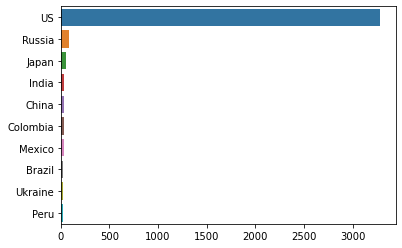

In [46]:
# Visualize the record counts by top 10 countries
subset2 = country_counts[:10]
sns.barplot(y=subset2.index, x=subset2.values)

In [47]:
# Select all cases of United States 
usCases = covidDF.loc[covidDF['Country_Region'] == 'US']
usCases

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Combined_Key,Incident_Rate,Case_Fatality_Ratio
673,1001.0,Autauga,Alabama,US,2/9/22 4:21,32.539527,-86.644082,15089,171,"Autauga, Alabama, US",27007.82187,1.133276
674,1003.0,Baldwin,Alabama,US,2/9/22 4:21,30.72775,-87.722071,53992,624,"Baldwin, Alabama, US",24186.27987,1.155727
675,1005.0,Barbour,Alabama,US,2/9/22 4:21,31.868263,-85.387129,5372,85,"Barbour, Alabama, US",21761.32221,1.582278
676,1007.0,Bibb,Alabama,US,2/9/22 4:21,32.996421,-87.125115,6244,96,"Bibb, Alabama, US",27882.46852,1.537476
677,1009.0,Blount,Alabama,US,2/9/22 4:21,33.982109,-86.567906,14417,211,"Blount, Alabama, US",24931.69163,1.46355
...,...,...,...,...,...,...,...,...,...,...,...,...
3947,56039.0,Teton,Wyoming,US,2/9/22 4:21,43.935225,-110.58908,9502,15,"Teton, Wyoming, US",40496.0791,0.157862
3948,56041.0,Uinta,Wyoming,US,2/9/22 4:21,41.287818,-110.547578,5539,36,"Uinta, Wyoming, US",27385.54336,0.649937
3949,90056.0,Unassigned,Wyoming,US,2/9/22 4:21,Missing,Missing,0,0,"Unassigned, Wyoming, US",Missing,Missing
3950,56043.0,Washakie,Wyoming,US,2/9/22 4:21,43.904516,-107.680187,2239,42,"Washakie, Wyoming, US",28686.73927,1.875837


In [48]:
state_counts = usCases['Province_State'].value_counts()
state_counts[:10]

Texas             255
Georgia           161
Virginia          134
Kentucky          121
Missouri          117
Kansas            107
Illinois          104
North Carolina    101
Iowa              100
Tennessee          97
Name: Province_State, dtype: int64

<AxesSubplot:>

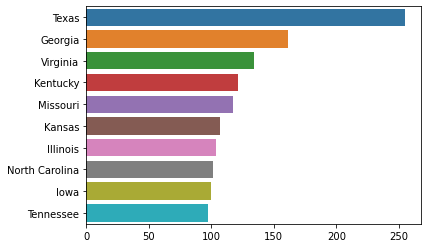

In [49]:
subset3 = state_counts[:10]
sns.barplot(y=subset3.index, x=subset3.values)